In [3]:
# For Data Analysis and exploration
import pandas as pd


# For numerical computations
import numpy as np


#for plotting and visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Players-Data.csv')

In [5]:
df.shape

(18420, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Overall  18420 non-null  int64
 1   Value    18420 non-null  int64
dtypes: int64(2)
memory usage: 287.9 KB


In [7]:
df.head(5)

,Overall,Value
0,91,54000000
1,91,64000000
2,91,84000000
3,91,107500000
4,91,190500000


In [8]:
df.columns

Index(['Overall', 'Value'], dtype='object')

In [9]:
df.isna().sum()

Overall    0
Value      0
dtype: int64

In [10]:
df['Value']=df['Value'].astype(float)

In [11]:
df['Overall']=df['Overall'].astype(int)

In [12]:
df.describe()

,Overall,Value
count,18420.000000,1.842000e+04
mean,65.792942,2.842697e+06
std,6.770177,7.645260e+06
min,47.000000,0.000000e+00
25%,62.000000,4.750000e+05
50%,66.000000,9.750000e+05
75%,70.000000,2.000000e+06
max,91.000000,1.905000e+08


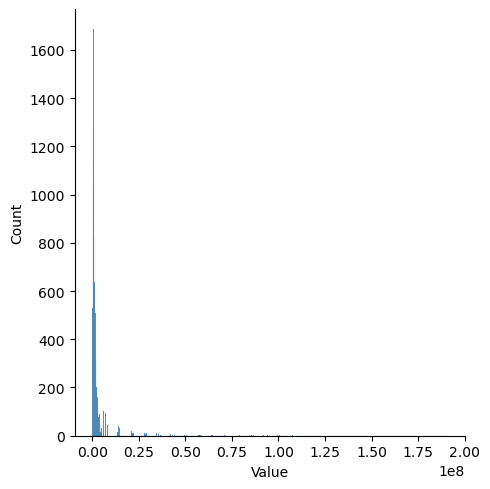

In [13]:
sns.displot(df['Value'])

<Axes: >

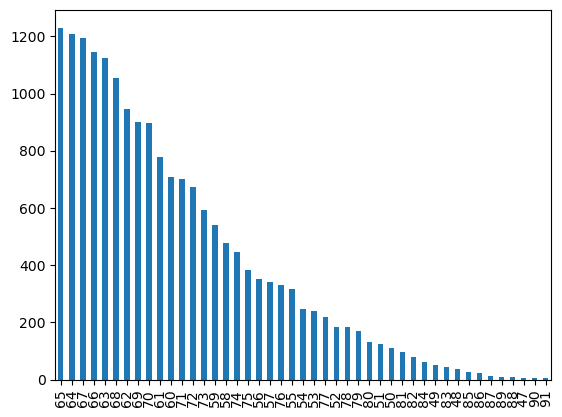

In [14]:
df['Overall'].value_counts().plot(kind='bar')

<function matplotlib.pyplot.show(close=None, block=None)>

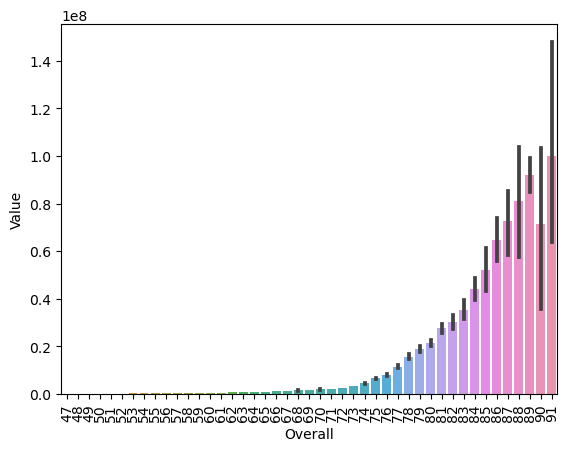

In [15]:
sns.barplot(x=df['Overall'],y=df['Value'])
plt.xticks(rotation='vertical')
plt.show

In [16]:
df.corr()['Value']

Overall    0.560209
Value      1.000000
Name: Value, dtype: float64

<Axes: >

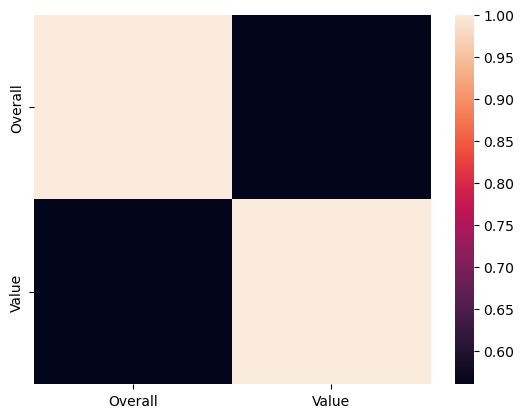

In [17]:
sns.heatmap(df.corr())

In [18]:
X = df.drop(columns=['Value'])
y = df['Value']

In [19]:
X

,Overall
0,91
1,91
2,91
3,91
4,91
...,...
18415,47
18416,47
18417,47
18418,47


In [20]:
y

0         54000000.0
1         64000000.0
2         84000000.0
3        107500000.0
4        190500000.0
            ...     
18415       110000.0
18416        90000.0
18417       130000.0
18418       100000.0
18419        60000.0
Name: Value, Length: 18420, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [22]:
X_train

,Overall
11906,63
1843,74
5121,69
13821,62
6222,68
...,...
14696,60
1099,76
11798,64
6637,68


In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score,mean_squared_error

In [24]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Reggression

In [25]:
step1 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.2852914426856148
MAE 3295819.5500937374


## LogisticRegression

In [28]:
step1 = LogisticRegression(max_iter=1000)

pipe = Pipeline([
    ('step1',step1),
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

R2 score 0.11840021854188854
MAE 2134737.6015200866
Accuracy: 0.03727832066594282


C:\Users\vuYELwa thE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

In [29]:
step1 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7800620257406022
MAE 1218671.73470865


## Decision Tree Regressor

In [30]:
step1 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083714283398213
MAE 1048312.8290136135


### Random Forest

In [31]:
step1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8054111824016619
MAE 1045444.2397704002


### Extra Trees

In [36]:
step1 = ExtraTreesRegressor(n_estimators=1000,
                              random_state=None,
                              max_samples=None,
                              max_features='sqrt',
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8083718584868178
MAE 1048315.4729227409


In [37]:
import pickle



In [38]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [44]:
prediction = pipe.predict(pd.DataFrame({'Overall': [49]}))

In [39]:
df


,Overall,Value
0,91,54000000.0
1,91,64000000.0
2,91,84000000.0
3,91,107500000.0
4,91,190500000.0
...,...,...
18415,47,110000.0
18416,47,90000.0
18417,47,130000.0
18418,47,100000.0


In [40]:
X_train


,Overall
11906,63
1843,74
5121,69
13821,62
6222,68
...,...
14696,60
1099,76
11798,64
6637,68
